In [6]:
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm
from torchvision.utils import save_image, make_grid
import pickle
from torch.utils.data import TensorDataset, DataLoader
from sklearn.mixture import GaussianMixture
from sklearn import decomposition
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt

In [2]:
dataset_path = '/mnt/disks/data/'
xs = np.stack(pickle.load(open( "aal_time_series_nyu_150.pkl", "rb")))
ys = np.stack(pickle.load(open( "aal_time_series_nyu_150_labels.pkl", "rb")))

In [3]:
covs = np.asarray([np.cov(xs[0].T)])
print(covs.shape)
for i in range(1,xs.shape[0]):
    covs = np.vstack((covs,[np.cov(xs[i].T)]))

(1, 116, 116)


In [4]:
covs.shape

(150, 116, 116)

In [5]:
np.asarray([covs[0][0]]).shape

(1, 116)

In [11]:
arr = np.asarray(covs[1])
arr

array([[1.00571429, 0.63930295, 0.34038705, ..., 0.33562462, 0.26864009,
        0.04912654],
       [0.63930295, 1.00571429, 0.30751715, ..., 0.26632902, 0.20655207,
        0.07455124],
       [0.34038705, 0.30751715, 1.00571429, ..., 0.29779646, 0.36004484,
        0.06136532],
       ...,
       [0.33562462, 0.26632902, 0.29779646, ..., 1.00571429, 0.42065078,
        0.08858554],
       [0.26864009, 0.20655207, 0.36004484, ..., 0.42065078, 1.00571429,
        0.25915683],
       [0.04912654, 0.07455124, 0.06136532, ..., 0.08858554, 0.25915683,
        1.00571429]])

In [12]:
covs = covs.reshape(150,-1)
covs.shape

(150, 13456)

<function matplotlib.pyplot.show(close=None, block=None)>

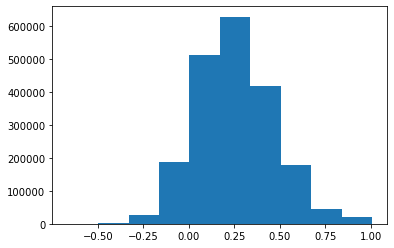

In [7]:
values = covs.flatten()
plt.hist(values)
plt.show

In [25]:
clf = LogisticRegression(random_state=0,penalty='l1',C=10,solver = 'liblinear')
cv_results = cross_validate(clf, covs, ys, cv=5,return_train_score=True)

In [26]:
cv_results['test_score']

array([0.76666667, 0.7       , 0.73333333, 0.56666667, 0.76666667])

In [27]:
cv_results

{'fit_time': array([0.13938856, 0.19138288, 0.18740463, 0.20457888, 0.1808517 ]),
 'score_time': array([0.00131059, 0.0011909 , 0.00123811, 0.00123787, 0.00121474]),
 'test_score': array([0.76666667, 0.7       , 0.73333333, 0.56666667, 0.76666667]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [54]:
pca = decomposition.PCA(n_components=25)

In [55]:
X = pca.fit_transform(covs)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


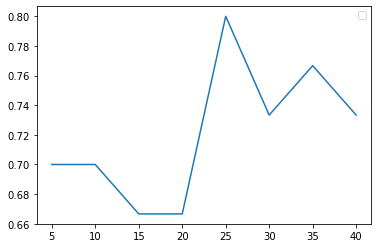

In [13]:
scores = []
pcs = [5,10,15,20,25,30,35,40]
for i in pcs:
    pca = decomposition.PCA(n_components=i)
    X = pca.fit_transform(covs)
    clf = LogisticRegression(random_state=0,penalty='l1',C=10,solver = 'liblinear')
    cv_results = cross_validate(clf, X, ys, cv=5,return_train_score=True)
    scores.append(max(cv_results['test_score']))
plt.plot(pcs,scores)
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


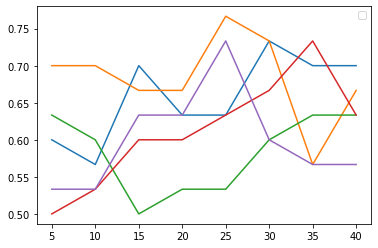

In [14]:
scores = []
pcs = [5,10,15,20,25,30,35,40]
for i in pcs:
    pca = decomposition.PCA(n_components=i)
    X = pca.fit_transform(covs)
    clf = LogisticRegression(random_state=0,penalty='l1',C=10,solver = 'liblinear')
    cv_results = cross_validate(clf, X, ys, cv=5,return_train_score=True)
    scores.append(cv_results['test_score'])
plt.plot(pcs,scores)
plt.legend()

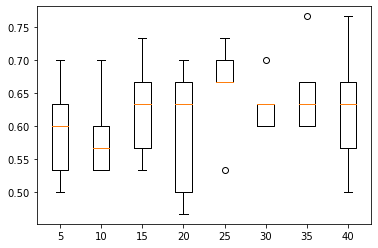

In [85]:
# Generate the data
scores = []
pcs = [5,10,15,20,25,30,35,40]
for i in pcs:
    pca = decomposition.PCA(n_components=i)
    X = pca.fit_transform(covs)
    clf = LogisticRegression(random_state=0, penalty='l1', C=10, solver='liblinear')
    cv_results = cross_validate(clf, X, ys, cv=5, return_train_score=True)
    scores.append(cv_results['test_score'])

# Create the figure and subplot
fig, ax = plt.subplots()

# Plot the box plots
bp = ax.boxplot(scores, positions=pcs, widths=2)

# Set the x-axis labels
ax.set_xticklabels(pcs)

# Show the plot
plt.show()


In [86]:
import pandas as pd

# Initialize an empty list to store the rows
rows = []

# Loop over the scores
for i, score in enumerate(scores):
    # Create a dictionary with the principal component and score values
    for j in range(len(score)):
        row = {'Principal Components': pcs[i], 'Score': score[j]}
    # Append the dictionary to the list
        rows.append(row)

# Create the dataframe from the list of dictionaries
df1 = pd.DataFrame(rows).assign(Method = 'Covariance')

In [101]:
subject_cov= np.cov(covs)

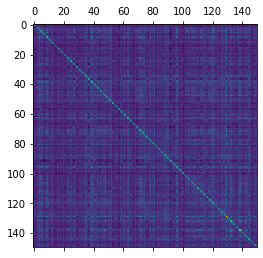

In [102]:
plt.matshow(subject_cov)

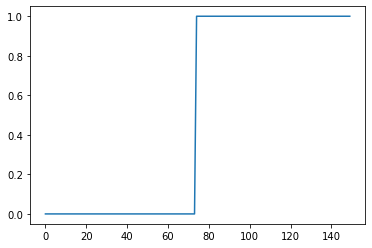

In [103]:
plt.plot(ys)

In [75]:
X.shape

(150, 20)

In [56]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [57]:
df = pd.DataFrame()
df["y"] = ys
df["comp-1"] = X_embedded[:,0]
df["comp-2"] = X_embedded[:,1]

[Text(0.5, 1.0, 'T-SNE projection')]

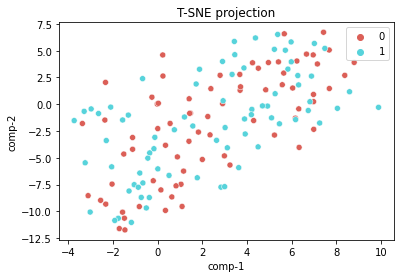

In [58]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection") 

# Correlations

In [47]:
# Calculate the mean of the x- and y-coordinates for each set of points
mean_x = np.mean(xs[:, :, 0], axis=1)
mean_y = np.mean(xs[:, :, 1], axis=1)

# Calculate the standard deviation of the x- and y-coordinates for each set of points
std_x = np.std(xs[:, :, 0], axis=1)
std_y = np.std(xs[:, :, 1], axis=1)

# Replace any zeros in the standard deviation with a small number to avoid division by zero
std_x = np.nan_to_num(std_x, 1e-10)
std_y = np.nan_to_num(std_y, 1e-10)

# Calculate the covariance matrix for each set of points
cov_matrices = np.asarray([np.cov(xs[i].T) for i in range(xs.shape[0])])

# Calculate the correlation matrix for each set of points by dividing
# the covariance matrix by the product of the standard deviation of the x- and y-coordinates
corr_matrices = cov_matrices / np.sqrt(std_x[:, None, None] * std_y[:, None, None])


In [48]:
corr_matrices = corr_matrices.reshape(150,-1)
corr_matrices.shape

(150, 13456)

In [49]:
clf = LogisticRegression(random_state=0,penalty='l1',C=10,solver = 'liblinear')
cv_results = cross_validate(clf, corr_matrices, ys, cv=5,return_train_score=True)

In [50]:
cv_results['test_score']

array([0.76666667, 0.7       , 0.73333333, 0.56666667, 0.76666667])

In [51]:
cv_results

{'fit_time': array([0.14027882, 0.19003963, 0.16792417, 0.19802904, 0.17256308]),
 'score_time': array([0.00137258, 0.00125003, 0.00129294, 0.00125289, 0.0013411 ]),
 'test_score': array([0.76666667, 0.7       , 0.73333333, 0.56666667, 0.76666667]),
 'train_score': array([1., 1., 1., 1., 1.])}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


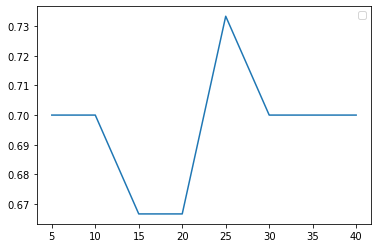

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
scores = []
pcs = [5,10,15,20,25,30,35,40]
for i in pcs:
    pca = decomposition.PCA(n_components=i)
    X = pca.fit_transform(corr_matrices)
    clf = LogisticRegression(random_state=0,penalty='l1',C=10,solver = 'liblinear')
    cv_results = cross_validate(clf, X, ys, cv=5,return_train_score=True)
    scores.append(max(cv_results['test_score']))
plt.plot(pcs,scores)
plt.legend()

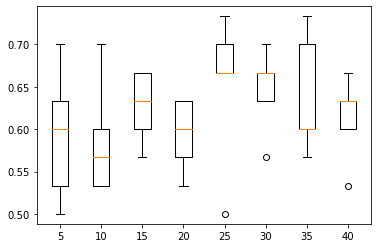

In [87]:
# Generate the data
scores = []
pcs = [5,10,15,20,25,30,35,40]
for i in pcs:
    pca = decomposition.PCA(n_components=i)
    X = pca.fit_transform(corr_matrices)
    clf = LogisticRegression(random_state=0, penalty='l1', C=10, solver='liblinear')
    cv_results = cross_validate(clf, X, ys, cv=5, return_train_score=True)
    scores.append(cv_results['test_score'])

# Create the figure and subplot
fig, ax = plt.subplots()

# Plot the box plots
bp = ax.boxplot(scores, positions=pcs, widths=2)

# Set the x-axis labels
ax.set_xticklabels(pcs)

# Show the plot
plt.show()


In [88]:
# Initialize an empty list to store the rows
rows = []

# Loop over the scores
for i, score in enumerate(scores):
    # Create a dictionary with the principal component and score values
    for j in range(len(score)):
        row = {'Principal Components': pcs[i], 'Score': score[j]}
    # Append the dictionary to the list
        rows.append(row)

# Create the dataframe from the list of dictionaries
df2 = pd.DataFrame(rows).assign(Method = 'Correlation')

In [60]:
pca = decomposition.PCA(n_components=25)
X = pca.fit_transform(corr_matrices)

In [61]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [62]:
df = pd.DataFrame()
df["y"] = ys
df["comp-1"] = X_embedded[:,0]
df["comp-2"] = X_embedded[:,1]

[Text(0.5, 1.0, 'T-SNE projection')]

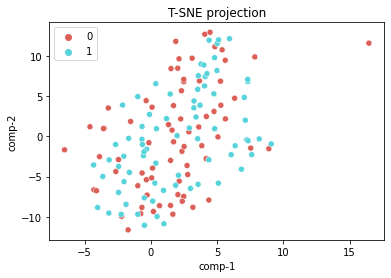

In [63]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection") 

# Shrunk Covariance

In [56]:
import numpy as np
from sklearn.covariance import ShrunkCovariance

shrunk_cov = ShrunkCovariance()

shrunk_cov.fit(xs[0])

covs_shrunk = np.asarray([shrunk_cov.covariance_])

for i in range(1, xs.shape[0]):
    shrunk_cov.fit(xs[i])
    covs_shrunk = np.vstack((covs_shrunk, [shrunk_cov.covariance_]))


In [57]:
covs_shrunk = covs_shrunk.reshape(150,-1)
covs_shrunk.shape

(150, 13456)

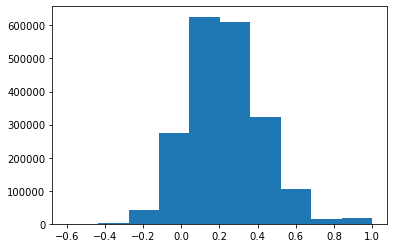

In [11]:
values = covs_shrunk.flatten()
plt.hist(values)
plt.show()

In [58]:
clf = LogisticRegression(random_state=0,penalty='l1',C=10,solver = 'liblinear')
cv_results = cross_validate(clf, covs_shrunk, ys, cv=5,return_train_score=True)

In [59]:
cv_results['test_score']

array([0.76666667, 0.7       , 0.7       , 0.56666667, 0.76666667])

In [60]:
cv_results

{'fit_time': array([0.10997915, 0.16448689, 0.17383146, 0.14932084, 0.16363311]),
 'score_time': array([0.00524592, 0.00140691, 0.00119972, 0.00131154, 0.00120664]),
 'test_score': array([0.76666667, 0.7       , 0.7       , 0.56666667, 0.76666667]),
 'train_score': array([1., 1., 1., 1., 1.])}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


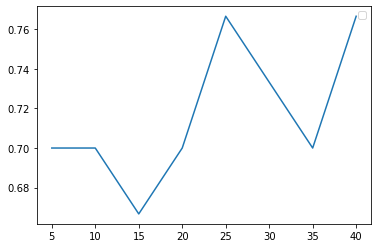

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
scores = []
pcs = [5,10,15,20,25,30,35,40]
for i in pcs:
    pca = decomposition.PCA(n_components=i)
    X = pca.fit_transform(covs_shrunk)
    clf = LogisticRegression(random_state=0,penalty='l1',C=10,solver = 'liblinear')
    cv_results = cross_validate(clf, X, ys, cv=5,return_train_score=True)
    scores.append(max(cv_results['test_score']))
plt.plot(pcs,scores)
plt.legend()

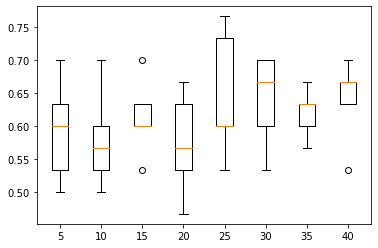

In [89]:
# Generate the data
scores = []
pcs = [5,10,15,20,25,30,35,40]
for i in pcs:
    pca = decomposition.PCA(n_components=i)
    X = pca.fit_transform(covs_shrunk)
    clf = LogisticRegression(random_state=0, penalty='l1', C=10, solver='liblinear')
    cv_results = cross_validate(clf, X, ys, cv=5, return_train_score=True)
    scores.append(cv_results['test_score'])

# Create the figure and subplot
fig, ax = plt.subplots()

# Plot the box plots
bp = ax.boxplot(scores, positions=pcs, widths=2)

# Set the x-axis labels
ax.set_xticklabels(pcs)

# Show the plot
plt.show()

In [90]:
# Initialize an empty list to store the rows
rows = []

# Loop over the scores
for i, score in enumerate(scores):
    # Create a dictionary with the principal component and score values
    for j in range(len(score)):
        row = {'Principal Components': pcs[i], 'Score': score[j]}
    # Append the dictionary to the list
        rows.append(row)

# Create the dataframe from the list of dictionaries
df3 = pd.DataFrame(rows).assign(Method = 'Shrunk Covariance')

In [43]:
pca = decomposition.PCA(n_components=25)
X = pca.fit_transform(covs_shrunk)
X_embedded = TSNE(n_components=2).fit_transform(X)

In [44]:
df = pd.DataFrame()
df["y"] = ys
df["comp-1"] = X_embedded[:,0]
df["comp-2"] = X_embedded[:,1]

[Text(0.5, 1.0, 'T-SNE projection')]

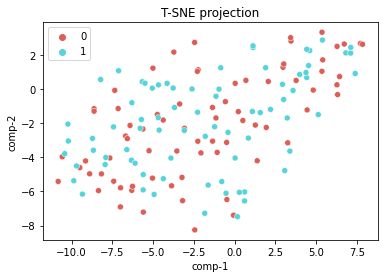

In [45]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection") 

# Empirical Covariance

In [81]:
from sklearn.covariance import EmpiricalCovariance

emp_cov = EmpiricalCovariance()
emp_cov.fit(xs[0])

covs_emp = np.asarray([emp_cov.covariance_])

for i in range(1, xs.shape[0]):
    emp_cov.fit(xs[i])
    covs_emp = np.vstack((covs_emp, [emp_cov.covariance_]))


In [82]:
covs_emp = covs_emp.reshape(150,-1)
covs_emp.shape

(150, 13456)

In [83]:
clf = LogisticRegression(random_state=0,penalty='l1',C=10,solver = 'liblinear')
cv_results = cross_validate(clf, covs_emp, ys, cv=5,return_train_score=True)
cv_results

{'fit_time': array([0.12203646, 0.1593492 , 0.1735003 , 0.15824246, 0.16021109]),
 'score_time': array([0.00131559, 0.00121713, 0.00128269, 0.0012536 , 0.00132942]),
 'test_score': array([0.76666667, 0.76666667, 0.73333333, 0.56666667, 0.76666667]),
 'train_score': array([1., 1., 1., 1., 1.])}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


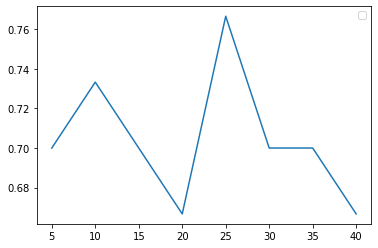

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
scores = []
pcs = [5,10,15,20,25,30,35,40]
for i in pcs:
    pca = decomposition.PCA(n_components=i)
    X = pca.fit_transform(covs_emp)
    clf = LogisticRegression(random_state=0,penalty='l1',C=10,solver = 'liblinear')
    cv_results = cross_validate(clf, X, ys, cv=5,return_train_score=True)
    scores.append(max(cv_results['test_score']))
plt.plot(pcs,scores)
plt.legend()

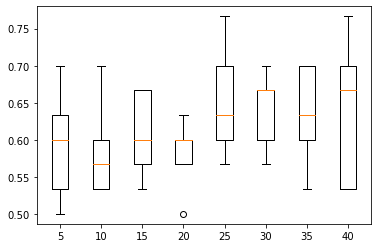

In [91]:
# Generate the data
scores = []
pcs = [5,10,15,20,25,30,35,40]
for i in pcs:
    pca = decomposition.PCA(n_components=i)
    X = pca.fit_transform(covs_emp)
    clf = LogisticRegression(random_state=0, penalty='l1', C=10, solver='liblinear')
    cv_results = cross_validate(clf, X, ys, cv=5, return_train_score=True)
    scores.append(cv_results['test_score'])

# Create the figure and subplot
fig, ax = plt.subplots()

# Plot the box plots
bp = ax.boxplot(scores, positions=pcs, widths=2)

# Set the x-axis labels
ax.set_xticklabels(pcs)

# Show the plot
plt.show()

In [92]:
# Initialize an empty list to store the rows
rows = []

# Loop over the scores
for i, score in enumerate(scores):
    # Create a dictionary with the principal component and score values
    for j in range(len(score)):
        row = {'Principal Components': pcs[i], 'Score': score[j]}
    # Append the dictionary to the list
        rows.append(row)

# Create the dataframe from the list of dictionaries
df4 = pd.DataFrame(rows).assign(Method = 'Empirical Covariance')

In [50]:
pca = decomposition.PCA(n_components=25)
X = pca.fit_transform(covs_emp)
X_embedded = TSNE(n_components=2).fit_transform(X)

In [51]:
df = pd.DataFrame()
df["y"] = ys
df["comp-1"] = X_embedded[:,0]
df["comp-2"] = X_embedded[:,1]

[Text(0.5, 1.0, 'T-SNE projection')]

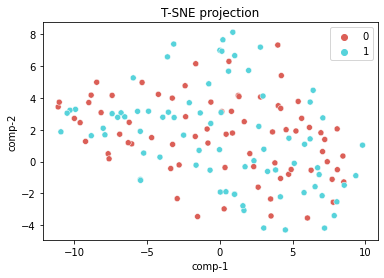

In [52]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection") 

In [100]:
cdf = pd.concat([df1, df2, df3, df4])   

In [101]:
cdf

,Principal Components,Score,Method
0,5,0.600000,Covariance
1,5,0.700000,Covariance
2,5,0.633333,Covariance
3,5,0.500000,Covariance
4,5,0.533333,Covariance
...,...,...,...
35,40,0.766667,Empirical Covariance
36,40,0.533333,Empirical Covariance
37,40,0.666667,Empirical Covariance
38,40,0.700000,Empirical Covariance


<function matplotlib.pyplot.show(close=None, block=None)>

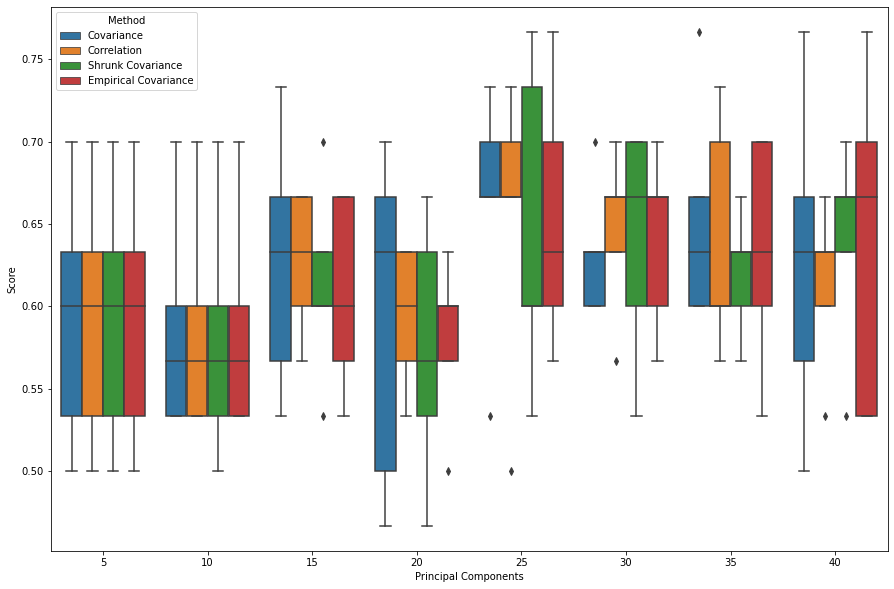

In [104]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="Principal Components", y="Score", hue="Method", data=cdf)
plt.show